In [1]:
import keras
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

In [2]:
data=pd.read_csv("C:/Users/LENOVO/OneDrive/Dokumen/datmin/weather_daily_darksky.csv")
data.head()

temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   

  apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00  ...            10.87  2011-11-11 07:12:14   
1        2011-12-11 02:00:00  ...             8.59  2011-12-11 07:57:02   
2        2011-12-27 22:00:00  ...            10.33  2011-12-27 08:07:06   
3        2011-12-02 07:00:00  ...             7.36  2011-12-02 07:46:09   
4        2011-12-24 07:00:00  ...             7.93  2011-12-24 08:06:15   

   temperatureHighTime          uvIndexTime  \
0  2011-11-11 19:00:00  2011-11-11 11:00:00   
1  2011-12-11 14:00:00  2011-12-11 12:00:00   
2  2011-12-27 14:00:00  2011-12-27 00:00:00   
3  2011-12-02 12:00:00  2011-12-02 10:00:00   
4  2011-12-24 15:00:00  2011-12-24 13:00:00   

                                             summary   temperatureLowTime  \
0                             Foggy until afternoon.  2011-11-11 19:00:00   
1                  Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                  Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3  Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                  Mostly cloudy throughout the day.  2011-12-24 19:00:00   

   apparentTemperatureMin  apparentTemperatureMaxTime  \
0                    6.48         2011-11-11 23:00:00   
1                    0.11         2011-12-11 20:00:00   
2                    5.59         2011-12-27 02:00:00   
3                    0.46         2011-12-02 12:00:00   
4                   -0.51         2011-12-24 23:00:00   

  apparentTemperatureLowTime moonPhase  
0        2011-11-11 19:00:00      0.52  
1        2011-12-12 08:00:00      0.53  
2        2011-12-28 00:00:00      0.10  
3        2011-12-02 19:00:00      0.25  
4        2011-12-24 20:00:00      0.99  

[5 rows x 32 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [4]:
data.describe(include="all")

temperatureMax   temperatureMaxTime  windBearing               icon  \
count       882.000000                  882   882.000000                882   
unique             NaN                  882          NaN                  6   
top                NaN  2013-05-04 15:00:00          NaN  partly-cloudy-day   
freq               NaN                    1          NaN                619   
mean         13.660113                  NaN   195.702948                NaN   
std           6.182744                  NaN    89.340783                NaN   
min          -0.060000                  NaN     0.000000                NaN   
25%           9.502500                  NaN   120.500000                NaN   
50%          12.625000                  NaN   219.000000                NaN   
75%          17.920000                  NaN   255.000000                NaN   
max          32.400000                  NaN   359.000000                NaN   

          dewPoint   temperatureMinTime  cloudCover   windSpeed     pressure  \
count   882.000000                  882  881.000000  882.000000   882.000000   
unique         NaN                  882         NaN         NaN          NaN   
top            NaN  2012-09-21 06:00:00         NaN         NaN          NaN   
freq           NaN                    1         NaN         NaN          NaN   
mean      6.530034                  NaN    0.477605    3.581803  1014.127540   
std       4.830875                  NaN    0.193514    1.694007    11.073038   
min      -7.840000                  NaN    0.000000    0.200000   979.250000   
25%       3.180000                  NaN    0.350000    2.370000  1007.435000   
50%       6.380000                  NaN    0.470000    3.440000  1014.615000   
75%      10.057500                  NaN    0.600000    4.577500  1021.755000   
max      17.770000                  NaN    1.000000    9.960000  1040.920000   

       apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
count                         882  ...       882.000000                  882   
unique                        882  ...              NaN                  882   
top           2012-12-27 14:00:00  ...              NaN  2012-02-14 07:18:54   
freq                            1  ...              NaN                    1   
mean                          NaN  ...        13.542392                  NaN   
std                           NaN  ...         6.260196                  NaN   
min                           NaN  ...        -0.810000                  NaN   
25%                           NaN  ...         9.212500                  NaN   
50%                           NaN  ...        12.470000                  NaN   
75%                           NaN  ...        17.910000                  NaN   
max                           NaN  ...        32.400000                  NaN   

        temperatureHighTime          uvIndexTime  \
count                   882                  881   
unique                  882                  881   
top     2013-05-04 15:00:00  2014-03-14 12:00:00   
freq                      1                    1   
mean                    NaN                  NaN   
std                     NaN                  NaN   
min                     NaN                  NaN   
25%                     NaN                  NaN   
50%                     NaN                  NaN   
75%                     NaN                  NaN   
max                     NaN                  NaN   

                                  summary   temperatureLowTime  \
count                                 882                  882   
unique                                 88                  882   
top     Mostly cloudy throughout the day.  2013-09-26 07:00:00   
freq                                  174                    1   
mean                                  NaN                  NaN   
std                                   NaN                  NaN   
min                                   NaN         

In [5]:
np.sum(data.isnull())

temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     1
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        1
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    1
summary                        0
temperatureLowTime             0
apparentTemperatureMin         0
apparentTemperatureMaxTime     0
apparentTe

In [6]:
modus1 = data['uvIndex'].mode()[0]
data['uvIndex'] = data['uvIndex'].fillna(modus1)
modus2 = data['uvIndexTime'].mode()[0]
data['uvIndexTime'] = data['uvIndexTime'].fillna(modus2)
mean1 = data['cloudCover'].mean()
data['cloudCover'] = data['cloudCover'].fillna(mean1)
np.sum(data.isnull())

temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     0
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        0
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    0
summary                        0
temperatureLowTime             0
apparentTemperatureMin         0
apparentTemperatureMaxTime     0
apparentTe

In [7]:
cols=['temperatureMax','windBearing','dewPoint','cloudCover','windSpeed','pressure','apparentTemperatureHigh','visibility','humidity','apparentTemperatureLow','apparentTemperatureMax','temperatureLow','temperatureMin','temperatureHigh','apparentTemperatureMin','moonPhase']
data=pd.concat([data[cols],data[['precipType','uvIndex','icon']]], axis=1)
data

temperatureMax  windBearing  dewPoint  cloudCover  windSpeed  pressure  \
0             11.96          123      9.40        0.79       3.88   1016.08   
1              8.59          198      4.49        0.56       3.94   1007.71   
2             10.33          225      5.47        0.85       3.54   1032.76   
3              8.07          232      3.69        0.32       3.00   1012.12   
4              8.22          252      2.79        0.37       4.46   1028.17   
..              ...          ...       ...         ...        ...       ...   
877            9.03          233      2.39        0.40       4.55   1002.10   
878           10.31          224      3.08        0.32       4.14   1007.02   
879           18.97          172      4.30        0.04       2.78   1022.44   
880            8.83          210      1.94        0.59       7.24    994.27   
881            9.90          233      2.95        0.35       9.96    988.63   

     apparentTemperatureHigh  visibility  humidity  apparentTemperatureLow  \
0                      10.87        3.30      0.95                   10.87   
1                       5.62       12.09      0.88                   -0.64   
2                      10.33       13.39      0.74                    5.52   
3                       5.33       11.89      0.87                    3.26   
4                       5.02       13.16      0.80                    4.37   
..                       ...         ...       ...                     ...   
877                     5.99       11.97      0.79                   -2.02   
878                    10.31       12.04      0.74                    0.82   
879                    18.97       10.62      0.58                    4.12   
880                     4.73       11.80      0.75                    0.05   
881                     5.79       12.38      0.69                   -1.03   

     apparentTemperatureMax  temperatureLow  temperatureMin  temperatureHigh  \
0                     11.96           10.87            8.85            10.87   
1                      5.72            3.09            2.48             8.59   
2                     10.33            8.03            8.03            10.33   
3                      5.33            6.33            2.56             7.36   
4                      5.32            7.45            3.17             7.93   
..                      ...             ...             ...              ...   
877                    5.99            2.56            3.26             9.03   
878                   10.31            3.43            3.93            10.31   
879                   18.97            5.04            7.65            18.97   
880                    4.73            4.14            3.03             8.83   
881                    5.79            2.34            5.38             9.90   

     apparentTemperatureMin  moonPhase precipType  uvIndex  \
0                      6.48       0.52       rain      1.0   
1                      0.11       0.53       rain      1.0   
2                      5.59       0.10       rain      0.0   
3                      0.46       0.25       rain      1.0   
4                     -0.51       0.99       rain      1.0   
..                      ...        ...        ...      ...   
877                   -1.30       0.84       rain      1.0   
878                    1.41       0.93       rain      2.0   
879                    7.08       0.28       rain      3.0   
880                   -1.20       0.42       rain      1.0   
881                    1.77       0.52       rain      1.0   

                    icon  
0                    fog  
1      partly-cloudy-day  
2      partly-cloudy-day  
3                   wind  
4    partly-cloudy-night  
..                   ...  
877    partly-cloudy-day  
878    partly-cloudy-day  
879  partly-cloudy-night  
880                 wind  
881                 wind  

[882 rows x 19 columns]

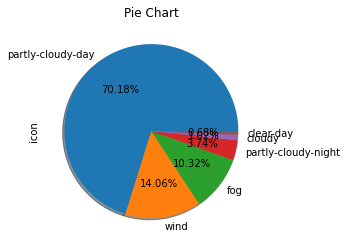

In [8]:
tipe = data['icon'].value_counts()
tipe.plot.pie(autopct='%.2f%%', shadow=True)
plt.title('Pie Chart')
plt.show()

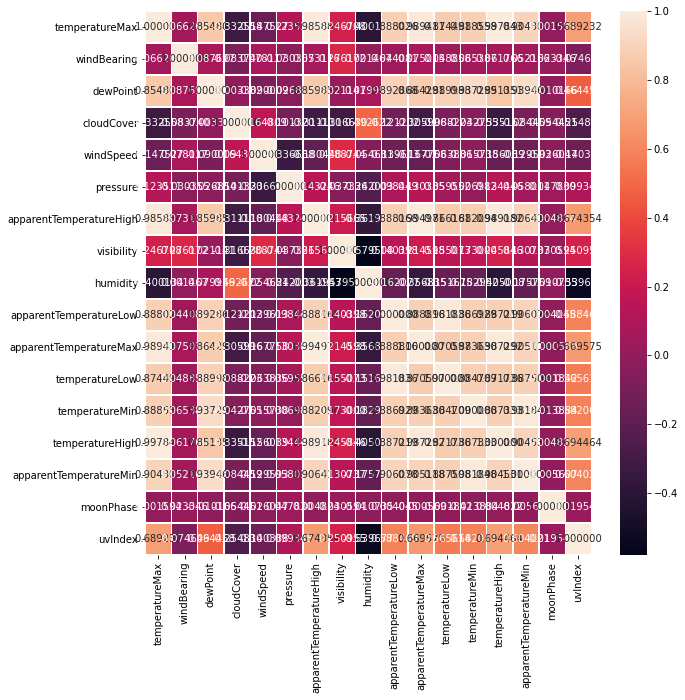

In [9]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.6f',ax=ax)
plt.show()

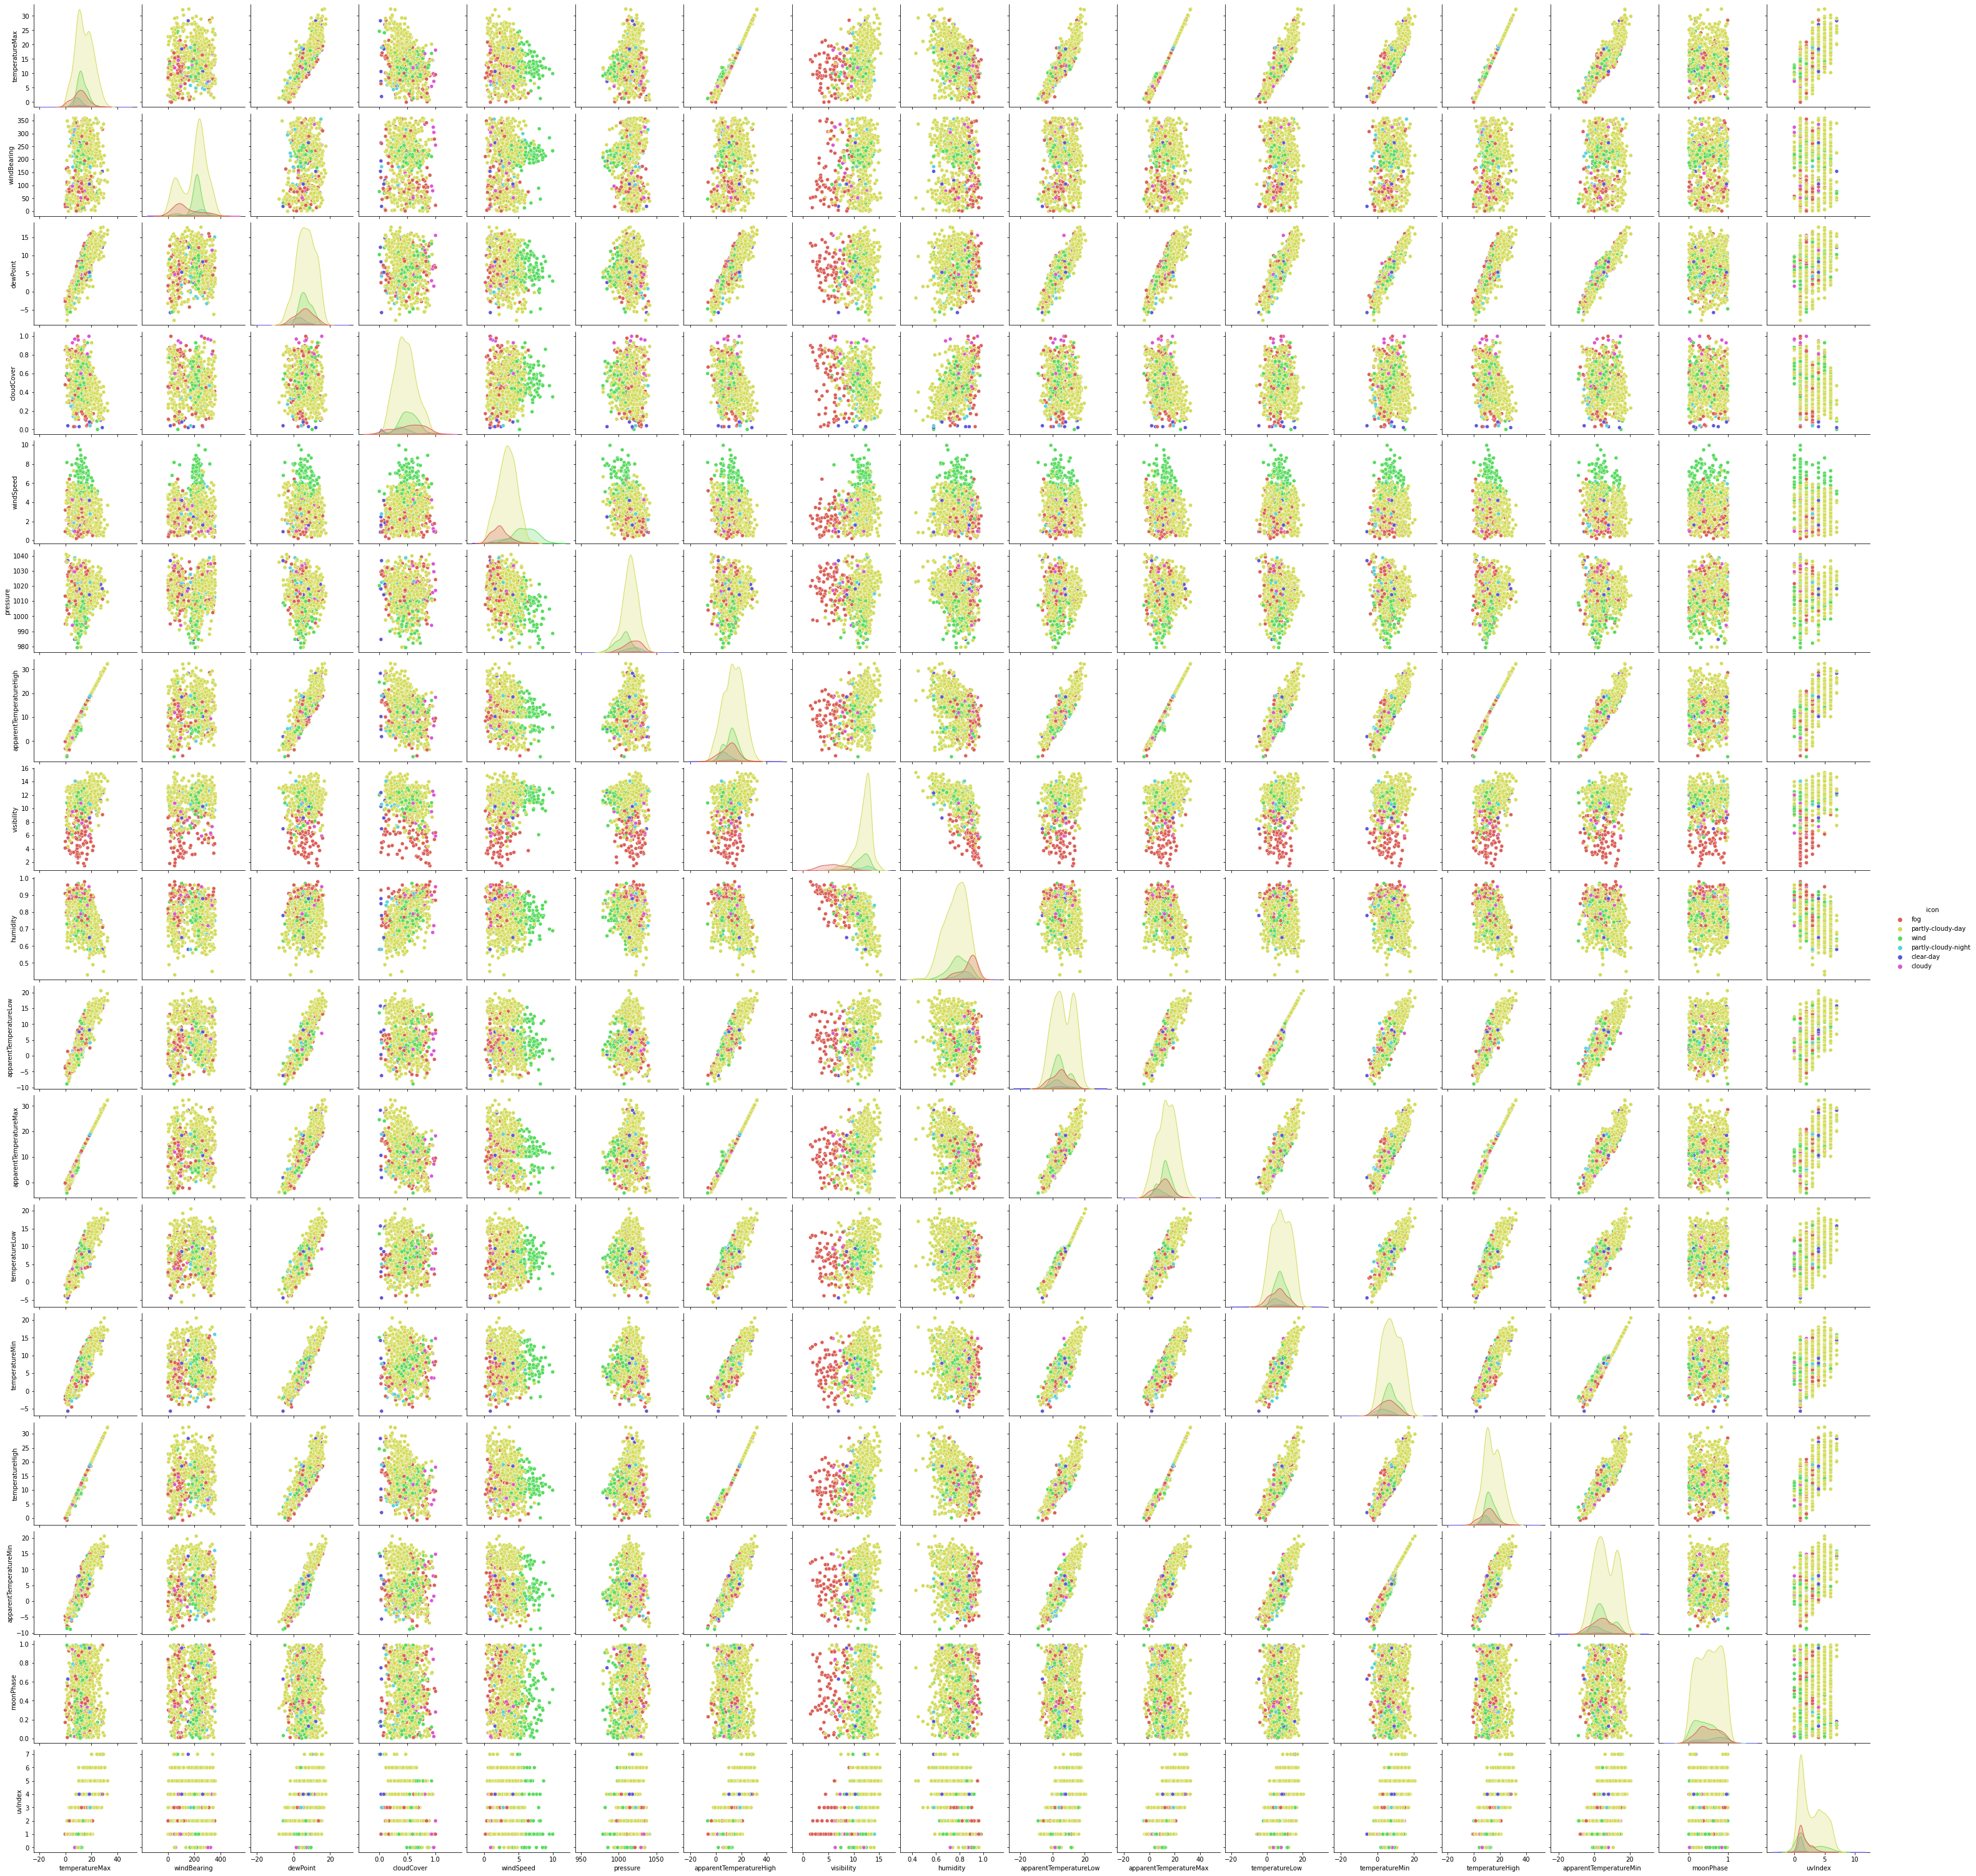

In [10]:
a=sns.pairplot(data,hue="icon", palette = 'hls')

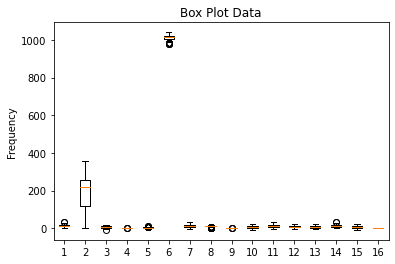

In [11]:
plt.boxplot(data[cols])
plt.title('Box Plot Data', size=12)
plt.ylabel('Frequency')
plt.show()

In [12]:
labelencoder=LabelEncoder()
data['icon']=labelencoder.fit_transform(data['icon'])
data['precipType']=labelencoder.fit_transform(data['precipType'])
data

temperatureMax  windBearing  dewPoint  cloudCover  windSpeed  pressure  \
0             11.96          123      9.40        0.79       3.88   1016.08   
1              8.59          198      4.49        0.56       3.94   1007.71   
2             10.33          225      5.47        0.85       3.54   1032.76   
3              8.07          232      3.69        0.32       3.00   1012.12   
4              8.22          252      2.79        0.37       4.46   1028.17   
..              ...          ...       ...         ...        ...       ...   
877            9.03          233      2.39        0.40       4.55   1002.10   
878           10.31          224      3.08        0.32       4.14   1007.02   
879           18.97          172      4.30        0.04       2.78   1022.44   
880            8.83          210      1.94        0.59       7.24    994.27   
881            9.90          233      2.95        0.35       9.96    988.63   

     apparentTemperatureHigh  visibility  humidity  apparentTemperatureLow  \
0                      10.87        3.30      0.95                   10.87   
1                       5.62       12.09      0.88                   -0.64   
2                      10.33       13.39      0.74                    5.52   
3                       5.33       11.89      0.87                    3.26   
4                       5.02       13.16      0.80                    4.37   
..                       ...         ...       ...                     ...   
877                     5.99       11.97      0.79                   -2.02   
878                    10.31       12.04      0.74                    0.82   
879                    18.97       10.62      0.58                    4.12   
880                     4.73       11.80      0.75                    0.05   
881                     5.79       12.38      0.69                   -1.03   

     apparentTemperatureMax  temperatureLow  temperatureMin  temperatureHigh  \
0                     11.96           10.87            8.85            10.87   
1                      5.72            3.09            2.48             8.59   
2                     10.33            8.03            8.03            10.33   
3                      5.33            6.33            2.56             7.36   
4                      5.32            7.45            3.17             7.93   
..                      ...             ...             ...              ...   
877                    5.99            2.56            3.26             9.03   
878                   10.31            3.43            3.93            10.31   
879                   18.97            5.04            7.65            18.97   
880                    4.73            4.14            3.03             8.83   
881                    5.79            2.34            5.38             9.90   

     apparentTemperatureMin  moonPhase  precipType  uvIndex  icon  
0                      6.48       0.52           0      1.0     2  
1                      0.11       0.53           0      1.0     3  
2                      5.59       0.10           0      0.0     3  
3                      0.46       0.25           0      1.0     5  
4                     -0.51       0.99           0      1.0     4  
..                      ...        ...         ...      ...   ...  
877                   -1.30       0.84           0      1.0     3  
878                    1.41       0.93           0      2.0     3  
879                    7.08       0.28           0      3.0     4  
880                   -1.20       0.42           0      1.0     5  
881                    1.77       0.52           0      1.0     5  

[882 rows x 19 columns]

In [13]:
target = data['icon']

In [14]:
target

0      2
1      3
2      3
3      5
4      4
      ..
877    3
878    3
879    4
880    5
881    5
Name: icon, Length: 882, dtype: int32

In [15]:
features = data.drop('icon', axis=1)
features

temperatureMax  windBearing  dewPoint  cloudCover  windSpeed  pressure  \
0             11.96          123      9.40        0.79       3.88   1016.08   
1              8.59          198      4.49        0.56       3.94   1007.71   
2             10.33          225      5.47        0.85       3.54   1032.76   
3              8.07          232      3.69        0.32       3.00   1012.12   
4              8.22          252      2.79        0.37       4.46   1028.17   
..              ...          ...       ...         ...        ...       ...   
877            9.03          233      2.39        0.40       4.55   1002.10   
878           10.31          224      3.08        0.32       4.14   1007.02   
879           18.97          172      4.30        0.04       2.78   1022.44   
880            8.83          210      1.94        0.59       7.24    994.27   
881            9.90          233      2.95        0.35       9.96    988.63   

     apparentTemperatureHigh  visibility  humidity  apparentTemperatureLow  \
0                      10.87        3.30      0.95                   10.87   
1                       5.62       12.09      0.88                   -0.64   
2                      10.33       13.39      0.74                    5.52   
3                       5.33       11.89      0.87                    3.26   
4                       5.02       13.16      0.80                    4.37   
..                       ...         ...       ...                     ...   
877                     5.99       11.97      0.79                   -2.02   
878                    10.31       12.04      0.74                    0.82   
879                    18.97       10.62      0.58                    4.12   
880                     4.73       11.80      0.75                    0.05   
881                     5.79       12.38      0.69                   -1.03   

     apparentTemperatureMax  temperatureLow  temperatureMin  temperatureHigh  \
0                     11.96           10.87            8.85            10.87   
1                      5.72            3.09            2.48             8.59   
2                     10.33            8.03            8.03            10.33   
3                      5.33            6.33            2.56             7.36   
4                      5.32            7.45            3.17             7.93   
..                      ...             ...             ...              ...   
877                    5.99            2.56            3.26             9.03   
878                   10.31            3.43            3.93            10.31   
879                   18.97            5.04            7.65            18.97   
880                    4.73            4.14            3.03             8.83   
881                    5.79            2.34            5.38             9.90   

     apparentTemperatureMin  moonPhase  precipType  uvIndex  
0                      6.48       0.52           0      1.0  
1                      0.11       0.53           0      1.0  
2                      5.59       0.10           0      0.0  
3                      0.46       0.25           0      1.0  
4                     -0.51       0.99           0      1.0  
..                      ...        ...         ...      ...  
877                   -1.30       0.84           0      1.0  
878                    1.41       0.93           0      2.0  
879                    7.08       0.28           0      3.0  
880                   -1.20       0.42           0      1.0  
881                    1.77       0.52           0      1.0  

[882 rows x 18 columns]

In [16]:
lasso = Lasso(alpha=1)

In [17]:
lasso.fit(features, target)

Lasso(alpha=1)

In [18]:
lasso_coef = pd.DataFrame({'Feature' : features.columns, 'LassoCoef' :
                          lasso.coef_}).sort_values(by= 'LassoCoef',
                                                   ascending=False)
lasso_coef

Feature  LassoCoef
1               windBearing   0.001366
0            temperatureMax  -0.000000
16               precipType  -0.000000
15                moonPhase  -0.000000
14   apparentTemperatureMin  -0.000000
13          temperatureHigh  -0.000000
12           temperatureMin   0.000000
11           temperatureLow   0.000000
10   apparentTemperatureMax  -0.000000
9    apparentTemperatureLow  -0.000000
8                  humidity  -0.000000
7                visibility   0.000000
6   apparentTemperatureHigh  -0.000000
4                 windSpeed   0.000000
3                cloudCover   0.000000
2                  dewPoint  -0.000000
17                  uvIndex   0.000000
5                  pressure  -0.015204

In [19]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by='LassoCoef', ascending=False)

Feature  LassoCoef
5                  pressure   0.015204
1               windBearing   0.001366
16               precipType   0.000000
15                moonPhase   0.000000
14   apparentTemperatureMin   0.000000
13          temperatureHigh   0.000000
12           temperatureMin   0.000000
11           temperatureLow   0.000000
10   apparentTemperatureMax   0.000000
0            temperatureMax   0.000000
8                  humidity   0.000000
7                visibility   0.000000
6   apparentTemperatureHigh   0.000000
4                 windSpeed   0.000000
3                cloudCover   0.000000
2                  dewPoint   0.000000
17                  uvIndex   0.000000
9    apparentTemperatureLow   0.000000

In [20]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(15)
lasso_df = pd.DataFrame({'Lasso Method' : lasso_df['Feature'].values})
lasso_df

Lasso Method
0                  pressure
1               windBearing
2                precipType
3                 moonPhase
4    apparentTemperatureMin
5           temperatureHigh
6            temperatureMin
7            temperatureLow
8    apparentTemperatureMax
9            temperatureMax
10                 humidity
11               visibility
12  apparentTemperatureHigh
13                windSpeed
14               cloudCover

In [21]:
data=data[['pressure','windBearing','precipType','moonPhase','apparentTemperatureMin','temperatureHigh','temperatureMin','temperatureLow','apparentTemperatureMax','temperatureMax','humidity','visibility','apparentTemperatureHigh','windSpeed','cloudCover','icon']]
data

pressure  windBearing  precipType  moonPhase  apparentTemperatureMin  \
0     1016.08          123           0       0.52                    6.48   
1     1007.71          198           0       0.53                    0.11   
2     1032.76          225           0       0.10                    5.59   
3     1012.12          232           0       0.25                    0.46   
4     1028.17          252           0       0.99                   -0.51   
..        ...          ...         ...        ...                     ...   
877   1002.10          233           0       0.84                   -1.30   
878   1007.02          224           0       0.93                    1.41   
879   1022.44          172           0       0.28                    7.08   
880    994.27          210           0       0.42                   -1.20   
881    988.63          233           0       0.52                    1.77   

     temperatureHigh  temperatureMin  temperatureLow  apparentTemperatureMax  \
0              10.87            8.85           10.87                   11.96   
1               8.59            2.48            3.09                    5.72   
2              10.33            8.03            8.03                   10.33   
3               7.36            2.56            6.33                    5.33   
4               7.93            3.17            7.45                    5.32   
..               ...             ...             ...                     ...   
877             9.03            3.26            2.56                    5.99   
878            10.31            3.93            3.43                   10.31   
879            18.97            7.65            5.04                   18.97   
880             8.83            3.03            4.14                    4.73   
881             9.90            5.38            2.34                    5.79   

     temperatureMax  humidity  visibility  apparentTemperatureHigh  windSpeed  \
0             11.96      0.95        3.30                    10.87       3.88   
1              8.59      0.88       12.09                     5.62       3.94   
2             10.33      0.74       13.39                    10.33       3.54   
3              8.07      0.87       11.89                     5.33       3.00   
4              8.22      0.80       13.16                     5.02       4.46   
..              ...       ...         ...                      ...        ...   
877            9.03      0.79       11.97                     5.99       4.55   
878           10.31      0.74       12.04                    10.31       4.14   
879           18.97      0.58       10.62                    18.97       2.78   
880            8.83      0.75       11.80                     4.73       7.24   
881            9.90      0.69       12.38                     5.79       9.96   

     cloudCover  icon  
0          0.79     2  
1          0.56     3  
2          0.85     3  
3          0.32     5  
4          0.37     4  
..          ...   ...  
877        0.40     3  
878        0.32     3  
879        0.04     4  
880        0.59     5  
881        0.35     5  

[882 rows x 16 columns]

In [22]:
X=data.iloc[:,0:15].values
X

array([[1.01608e+03, 1.23000e+02, 0.00000e+00, ..., 1.08700e+01,
        3.88000e+00, 7.90000e-01],
       [1.00771e+03, 1.98000e+02, 0.00000e+00, ..., 5.62000e+00,
        3.94000e+00, 5.60000e-01],
       [1.03276e+03, 2.25000e+02, 0.00000e+00, ..., 1.03300e+01,
        3.54000e+00, 8.50000e-01],
       ...,
       [1.02244e+03, 1.72000e+02, 0.00000e+00, ..., 1.89700e+01,
        2.78000e+00, 4.00000e-02],
       [9.94270e+02, 2.10000e+02, 0.00000e+00, ..., 4.73000e+00,
        7.24000e+00, 5.90000e-01],
       [9.88630e+02, 2.33000e+02, 0.00000e+00, ..., 5.79000e+00,
        9.96000e+00, 3.50000e-01]])

In [23]:
Y=data.iloc[:,15].values
Y

array([2, 3, 3, 5, 4, 5, 2, 2, 5, 2, 2, 3, 3, 3, 3, 4, 3, 3, 4, 2, 5, 4,
       3, 5, 2, 5, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 5, 2, 2, 3, 5, 2, 2, 3, 3, 3, 3, 5, 5, 2, 3, 4, 5, 3, 3, 2, 5,
       4, 3, 3, 3, 3, 3, 3, 5, 2, 5, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 2, 3,
       3, 3, 3, 2, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 3, 5, 3,
       3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 2, 3, 3, 5, 5, 3, 3, 3, 2, 5, 2,
       3, 3, 3, 2, 3, 5, 3, 5, 2, 3, 5, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 4, 5, 3, 3, 3, 3, 3, 3, 4, 3, 5, 3, 3, 3, 3, 3, 3, 3, 5, 3,
       3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 5, 2, 3, 3, 3, 5, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 5, 3, 4, 5, 3, 2, 3, 5, 3, 3, 3, 3, 5, 3, 3,
       3, 3, 4, 3, 5, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 3, 3,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 4, 5, 4, 2, 5, 3, 4, 3, 3,
       3, 3, 5, 2, 3, 3, 3, 3, 3, 2, 2, 3, 5, 3, 3,

In [24]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
from scipy import interp
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

In [25]:
model=Sequential()
model.add(Dense(16,input_dim=15,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________


In [27]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [28]:
cm=[]
total=[]
ac=[]
se=[]
sp=[]

-------------Training Neural Network Fold ke- 1 -------------
Epoch 1/10
40/40 [==============================] - 1s 9ms/step - loss: 1.8533 - accuracy: 0.2245 - val_loss: 1.7569 - val_accuracy: 0.2584
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 1.5892 - accuracy: 0.5246 - val_loss: 1.6072 - val_accuracy: 0.4719
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 1.3070 - accuracy: 0.6759 - val_loss: 1.4286 - val_accuracy: 0.5169
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 1.0690 - accuracy: 0.7112 - val_loss: 1.3221 - val_accuracy: 0.5169
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.9559 - accuracy: 0.7175 - val_loss: 1.2565 - val_accuracy: 0.5506
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.8806 - accuracy: 0.7327 - val_loss: 1.2083 - val_accuracy: 0.5843
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.8397 - accuracy: 0.7491 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


confusion matrix [[416  29]
 [ 35  54]]
akurasi 0.8801498127340824
spesifisitas 0.6067415730337079
sensitivitas 0.9348314606741573
recalls [0.93483146 0.60674157]
presisi [0.92239468 0.65060241]


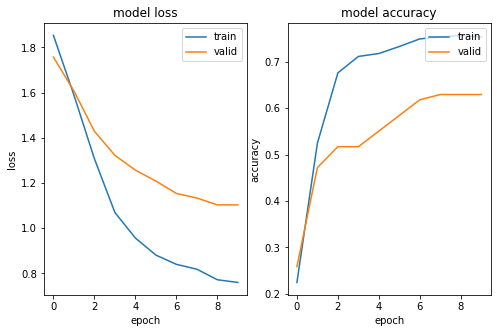

-------------Training Neural Network Fold ke- 2 -------------
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7741 - accuracy: 0.7491 - val_loss: 0.7274 - val_accuracy: 0.7640
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7720 - accuracy: 0.7478 - val_loss: 0.7177 - val_accuracy: 0.7640
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7752 - accuracy: 0.7352 - val_loss: 0.7039 - val_accuracy: 0.7753
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.7491 - val_loss: 0.6947 - val_accuracy: 0.7753
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7314 - accuracy: 0.7541 - val_loss: 0.6811 - val_accuracy: 0.7640
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7213 - accuracy: 0.7528 - val_loss: 0.6739 - val_accuracy: 0.7640
Epoch 7/10
40/40 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.7654 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


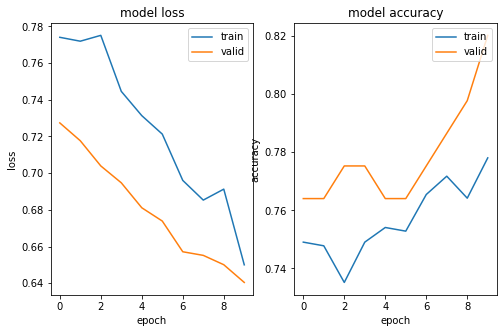

-------------Training Neural Network Fold ke- 3 -------------
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.7859 - val_loss: 0.6386 - val_accuracy: 0.8182
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.7809 - val_loss: 0.6357 - val_accuracy: 0.8182
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.8048 - val_loss: 0.6295 - val_accuracy: 0.8295
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.8060 - val_loss: 0.6232 - val_accuracy: 0.8182
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.8111 - val_loss: 0.6224 - val_accuracy: 0.8182
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.8073 - val_loss: 0.6195 - val_accuracy: 0.7955
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.8060 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


 [[426  14]
 [ 22  66]]
akurasi 0.9318181818181818
spesifisitas 0.75
sensitivitas 0.9681818181818181
recalls [0.96818182 0.75      ]
presisi [0.95089286 0.825     ]


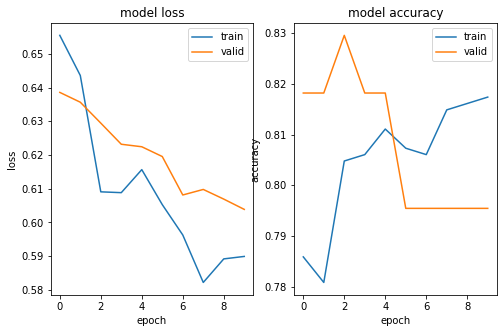

-------------Training Neural Network Fold ke- 4 -------------
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.8262 - val_loss: 0.4785 - val_accuracy: 0.8295
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.8136 - val_loss: 0.4806 - val_accuracy: 0.8182
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.8249 - val_loss: 0.4735 - val_accuracy: 0.8295
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.8149 - val_loss: 0.4768 - val_accuracy: 0.8182
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.8086 - val_loss: 0.4717 - val_accuracy: 0.8068
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.8086 - val_loss: 0.4713 - val_accuracy: 0.8068
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.8212 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


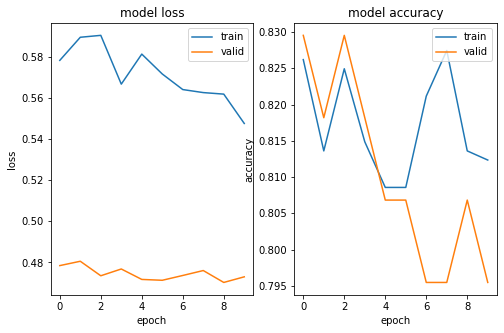

-------------Training Neural Network Fold ke- 5 -------------
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5343 - accuracy: 0.8136 - val_loss: 0.4778 - val_accuracy: 0.8409
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.8224 - val_loss: 0.4797 - val_accuracy: 0.8409
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.8249 - val_loss: 0.4796 - val_accuracy: 0.8409
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.8212 - val_loss: 0.4859 - val_accuracy: 0.8295
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.8199 - val_loss: 0.4777 - val_accuracy: 0.8295
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.8249 - val_loss: 0.4837 - val_accuracy: 0.8409
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8098 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


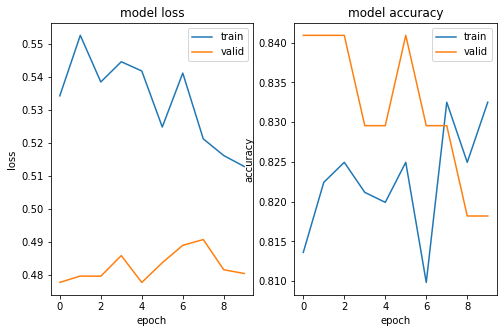

-------------Training Neural Network Fold ke- 6 -------------
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.8161 - val_loss: 0.4467 - val_accuracy: 0.8864
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.8312 - val_loss: 0.4511 - val_accuracy: 0.8864
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.8224 - val_loss: 0.4578 - val_accuracy: 0.8864
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.8111 - val_loss: 0.4615 - val_accuracy: 0.8864
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.8161 - val_loss: 0.4616 - val_accuracy: 0.8864
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8199 - val_loss: 0.4645 - val_accuracy: 0.8864
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.8123 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


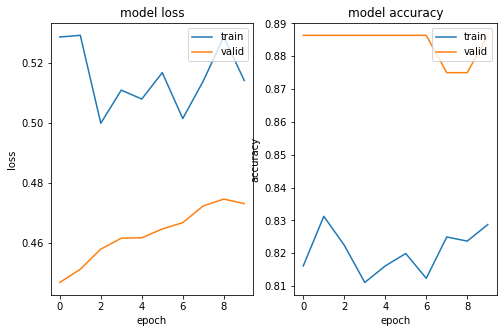

-------------Training Neural Network Fold ke- 7 -------------
Epoch 1/10
40/40 [==============================] - 0s 5ms/step - loss: 0.5150 - accuracy: 0.8224 - val_loss: 0.4139 - val_accuracy: 0.8523
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.8312 - val_loss: 0.4259 - val_accuracy: 0.8523
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5106 - accuracy: 0.8237 - val_loss: 0.4212 - val_accuracy: 0.8523
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.8312 - val_loss: 0.4284 - val_accuracy: 0.8523
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.8275 - val_loss: 0.4285 - val_accuracy: 0.8523
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.8275 - val_loss: 0.4335 - val_accuracy: 0.8523
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4935 - accuracy: 0.8287 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


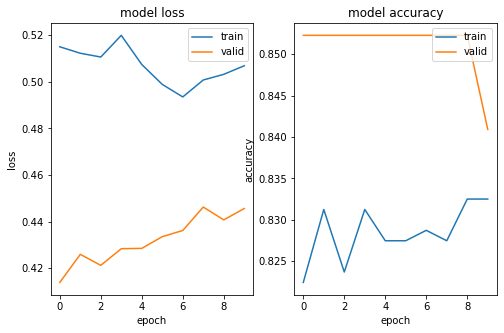

-------------Training Neural Network Fold ke- 8 -------------
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.8262 - val_loss: 0.3605 - val_accuracy: 0.8750
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.8300 - val_loss: 0.3633 - val_accuracy: 0.8750
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8275 - val_loss: 0.3647 - val_accuracy: 0.8750
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.8363 - val_loss: 0.3646 - val_accuracy: 0.8636
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.8287 - val_loss: 0.3659 - val_accuracy: 0.8636
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.8275 - val_loss: 0.3686 - val_accuracy: 0.8636
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.8287 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


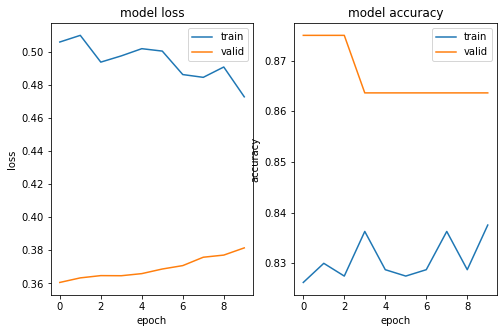

-------------Training Neural Network Fold ke- 9 -------------
Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.8401 - val_loss: 0.3887 - val_accuracy: 0.8636
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.8388 - val_loss: 0.3970 - val_accuracy: 0.8409
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.8224 - val_loss: 0.3979 - val_accuracy: 0.8636
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.8300 - val_loss: 0.4036 - val_accuracy: 0.8636
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.8325 - val_loss: 0.4004 - val_accuracy: 0.8636
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.8325 - val_loss: 0.4041 - val_accuracy: 0.8523
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.8363 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


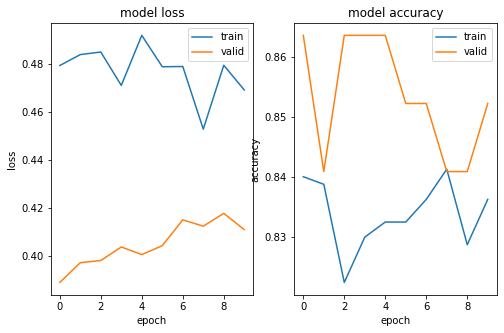

-------------Training Neural Network Fold ke- 10 -------------
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4538 - accuracy: 0.8413 - val_loss: 0.6371 - val_accuracy: 0.8182
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8338 - val_loss: 0.6423 - val_accuracy: 0.8182
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.8463 - val_loss: 0.6361 - val_accuracy: 0.8182
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.8388 - val_loss: 0.6397 - val_accuracy: 0.8068
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.4325 - accuracy: 0.8489 - val_loss: 0.6480 - val_accuracy: 0.8182
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8476 - val_loss: 0.6496 - val_accuracy: 0.8182
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.8363

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


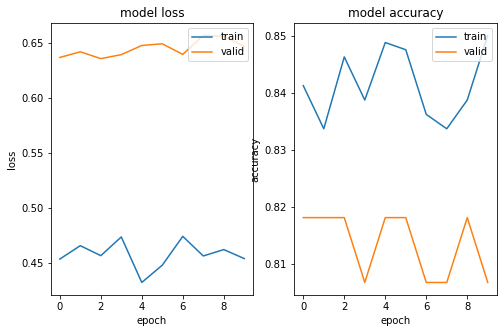

Akurasi Neural Network Kfold Cross Validation =  0.9378979400749066


In [29]:
acc = 0
fold_no =1
for train_index, test_index in kf.split(X,Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_train=to_categorical(y_train)
    y_test=to_categorical(y_test)
    ss=StandardScaler()
    X_train=ss.fit_transform(X_train)
    X_test=ss.fit_transform(X_test)
    print("-------------Training Neural Network Fold ke-",fold_no,"-------------")
    history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)
    history
    y_pred = model.predict(X_test)
    y_pred=np.round(y_pred)
    conf_matrix=confusion_matrix(y_test.ravel(),y_pred.ravel())
    sensitivitas=conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    akurasi=accuracy_score(y_test.ravel(),y_pred.ravel())
    presisi=precision_score(y_test.ravel(),y_pred.ravel(),pos_label=0,average=None)
    recalls=recall_score(y_test.ravel(),y_pred.ravel(),pos_label=0,average=None)
    spesifisitas=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    print("confusion matrix",conf_matrix)
    print("akurasi",akurasi)
    print("spesifisitas",spesifisitas)
    print("sensitivitas",sensitivitas)
    print("recalls",recalls)
    print("presisi",presisi)
    acc= acc + akurasi
    f,ax=plt.subplots(figsize=(8,5))
    # summarize history for loss
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    # summarize history for accuracy
    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()
    fold_no += 1
print("Akurasi Neural Network Kfold Cross Validation = ",acc/10)

<ipython-input-30-a56ebbb85efb>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-a56ebbb85efb>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-a56ebbb85efb>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-a56ebbb85efb>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-a56ebbb85efb>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-a56ebbb85efb>:13: DeprecationWarning: scipy.interp i

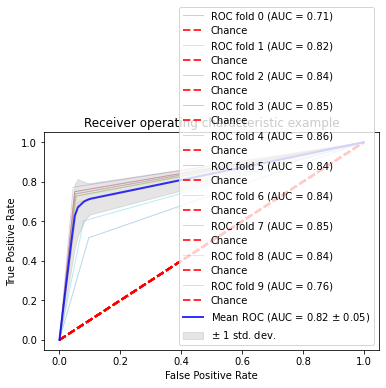

In [30]:

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train_index, test_index in kf.split(X,Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_train=to_categorical(y_train)
    y_test=to_categorical(y_test)
    y_pred = model.predict(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_pred.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


FOLD  1
-------------Training Neural Network Fold ke- 1 -------------
Epoch 1/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4644 - accuracy: 0.8326 - val_loss: 0.3832 - val_accuracy: 0.8588
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4597 - accuracy: 0.8340 - val_loss: 0.3906 - val_accuracy: 0.8531
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4570 - accuracy: 0.8496 - val_loss: 0.3907 - val_accuracy: 0.8475
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.8326 - val_loss: 0.3999 - val_accuracy: 0.8418
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.8284 - val_loss: 0.4054 - val_accuracy: 0.8475
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.8255 - val_loss: 0.4044 - val_accuracy: 0.8475
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


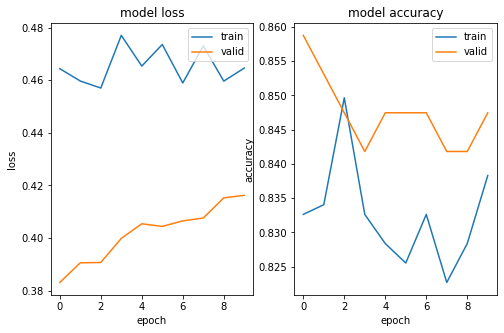

FOLD  2
-------------Training Neural Network Fold ke- 2 -------------
Epoch 1/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4501 - accuracy: 0.8397 - val_loss: 0.3959 - val_accuracy: 0.8644
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.8426 - val_loss: 0.3951 - val_accuracy: 0.8588
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.8383 - val_loss: 0.3990 - val_accuracy: 0.8644
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.8298 - val_loss: 0.3991 - val_accuracy: 0.8644
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.8355 - val_loss: 0.4038 - val_accuracy: 0.8588
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4405 - accuracy: 0.8340 - val_loss: 0.4091 - val_accuracy: 0.8588
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


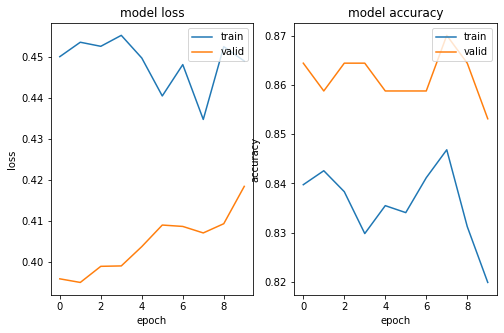

FOLD  3
-------------Training Neural Network Fold ke- 3 -------------
Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 0.4506 - accuracy: 0.8326 - val_loss: 0.4256 - val_accuracy: 0.8588
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 0.4619 - accuracy: 0.8326 - val_loss: 0.4211 - val_accuracy: 0.8644
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4434 - accuracy: 0.8369 - val_loss: 0.4290 - val_accuracy: 0.8588
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4260 - accuracy: 0.8454 - val_loss: 0.4360 - val_accuracy: 0.8588
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.8440 - val_loss: 0.4341 - val_accuracy: 0.8531
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 0.4271 - accuracy: 0.8284 - val_loss: 0.4259 - val_accuracy: 0.8475
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


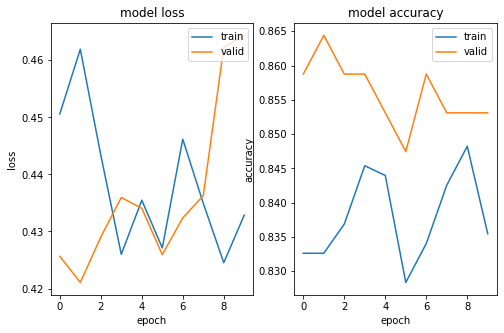

FOLD  4
-------------Training Neural Network Fold ke- 4 -------------
Epoch 1/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.8440 - val_loss: 0.3746 - val_accuracy: 0.8701
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.8397 - val_loss: 0.3730 - val_accuracy: 0.8870
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8426 - val_loss: 0.3734 - val_accuracy: 0.8701
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.8411 - val_loss: 0.3725 - val_accuracy: 0.8701
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.8440 - val_loss: 0.3758 - val_accuracy: 0.8644
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.8553 - val_loss: 0.3765 - val_accuracy: 0.8644
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4317 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


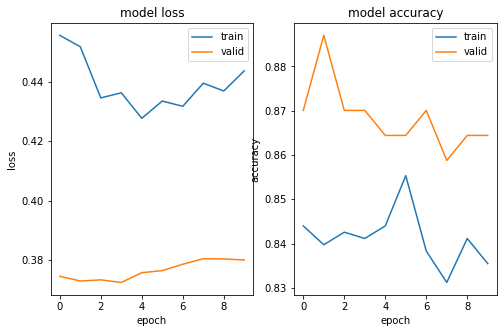

FOLD  5
-------------Training Neural Network Fold ke- 5 -------------
Epoch 1/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4252 - accuracy: 0.8482 - val_loss: 0.4135 - val_accuracy: 0.8362
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8468 - val_loss: 0.4176 - val_accuracy: 0.8362
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8440 - val_loss: 0.4197 - val_accuracy: 0.8249
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8511 - val_loss: 0.4193 - val_accuracy: 0.8305
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8553 - val_loss: 0.4243 - val_accuracy: 0.8305
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.8355 - val_loss: 0.4315 - val_accuracy: 0.8305
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


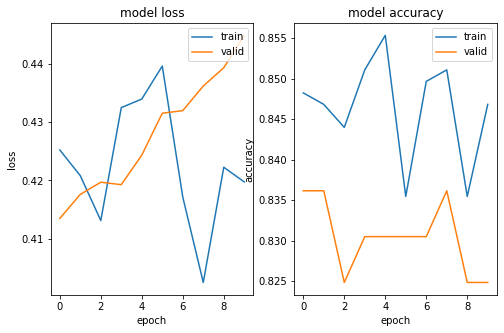

FOLD  6
-------------Training Neural Network Fold ke- 6 -------------
Epoch 1/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4301 - accuracy: 0.8468 - val_loss: 0.4044 - val_accuracy: 0.8531
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4431 - accuracy: 0.8397 - val_loss: 0.4048 - val_accuracy: 0.8588
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.8312 - val_loss: 0.4081 - val_accuracy: 0.8588
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8411 - val_loss: 0.4099 - val_accuracy: 0.8644
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8496 - val_loss: 0.4121 - val_accuracy: 0.8644
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8454 - val_loss: 0.4128 - val_accuracy: 0.8644
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4205 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


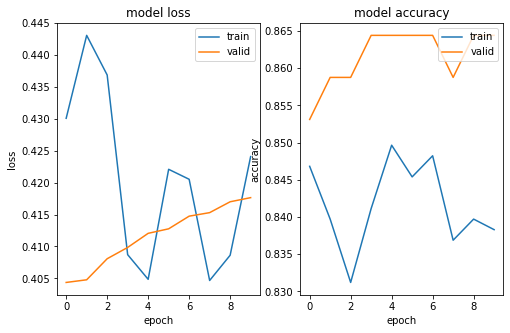

FOLD  7
-------------Training Neural Network Fold ke- 7 -------------
Epoch 1/10
23/23 [==============================] - 0s 16ms/step - loss: 0.4194 - accuracy: 0.8468 - val_loss: 0.4120 - val_accuracy: 0.8418
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 0.4185 - accuracy: 0.8397 - val_loss: 0.4141 - val_accuracy: 0.8418
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8454 - val_loss: 0.4132 - val_accuracy: 0.8418
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8383 - val_loss: 0.4143 - val_accuracy: 0.8418
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8454 - val_loss: 0.4117 - val_accuracy: 0.8362
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8426 - val_loss: 0.4126 - val_accuracy: 0.8305
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


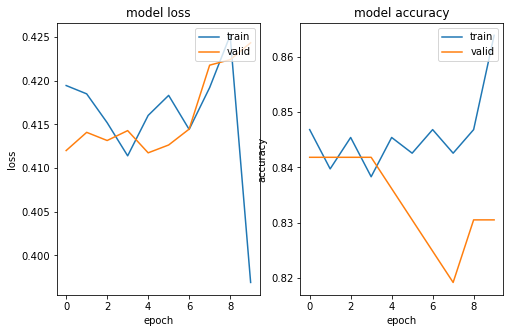

FOLD  8
-------------Training Neural Network Fold ke- 8 -------------
Epoch 1/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4275 - accuracy: 0.8411 - val_loss: 0.4106 - val_accuracy: 0.8418
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8610 - val_loss: 0.4139 - val_accuracy: 0.8418
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8496 - val_loss: 0.4178 - val_accuracy: 0.8305
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8440 - val_loss: 0.4222 - val_accuracy: 0.8305
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8525 - val_loss: 0.4261 - val_accuracy: 0.8305
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8582 - val_loss: 0.4267 - val_accuracy: 0.8249
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


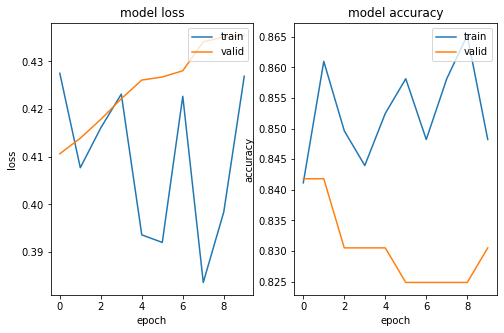

FOLD  9
-------------Training Neural Network Fold ke- 9 -------------
Epoch 1/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.8397 - val_loss: 0.3638 - val_accuracy: 0.8531
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8482 - val_loss: 0.3653 - val_accuracy: 0.8531
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8397 - val_loss: 0.3652 - val_accuracy: 0.8588
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8496 - val_loss: 0.3592 - val_accuracy: 0.8531
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8454 - val_loss: 0.3592 - val_accuracy: 0.8588
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8440 - val_loss: 0.3655 - val_accuracy: 0.8644
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


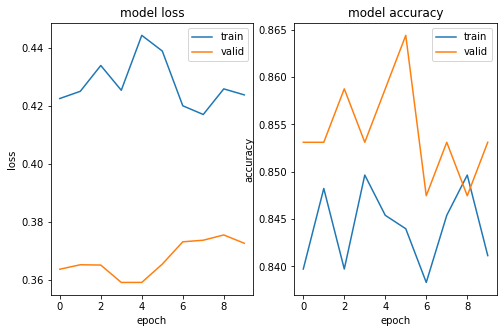

FOLD  10
-------------Training Neural Network Fold ke- 10 -------------
Epoch 1/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8567 - val_loss: 0.3679 - val_accuracy: 0.8249
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8440 - val_loss: 0.3705 - val_accuracy: 0.8305
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8454 - val_loss: 0.3754 - val_accuracy: 0.8305
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8511 - val_loss: 0.3775 - val_accuracy: 0.8305
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8596 - val_loss: 0.3770 - val_accuracy: 0.8249
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8539 - val_loss: 0.3781 - val_accuracy: 0.8305
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4124 - accurac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


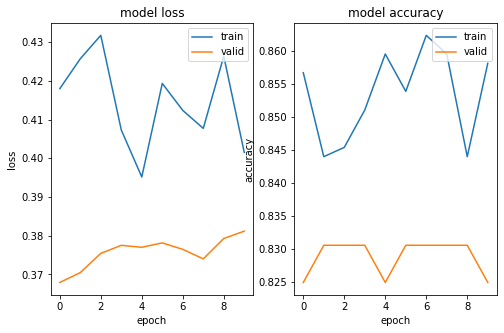

Akurasi Neural Network Kfold Cross Validation =  0.9503766478342749


In [31]:
from sklearn.model_selection import ShuffleSplit
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
acc = 0
fold_no = 1
for train_index, test_index in ssplit.split(X, Y):
    print("FOLD ",fold_no)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_train=to_categorical(y_train)
    y_test=to_categorical(y_test)
    ss=StandardScaler()
    X_train=ss.fit_transform(X_train)
    X_test=ss.fit_transform(X_test)
    print("-------------Training Neural Network Fold ke-",fold_no,"-------------")
    history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=1)
    history
    y_pred = model.predict(X_test)
    y_pred=np.round(y_pred)
    conf_matrix=confusion_matrix(y_test.ravel(),y_pred.ravel())
    sensitivitas=conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    akurasi=accuracy_score(y_test.ravel(),y_pred.ravel())
    presisi=precision_score(y_test.ravel(),y_pred.ravel(),pos_label=0,average=None)
    recalls=recall_score(y_test.ravel(),y_pred.ravel(),pos_label=0,average=None)
    spesifisitas=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    print("confusion matrix",conf_matrix)
    print("akurasi",akurasi)
    print("spesifisitas",spesifisitas)
    print("sensitivitas",sensitivitas)
    print("recalls",recalls)
    print("presisi",presisi)
    acc= acc + akurasi  
    f,ax=plt.subplots(figsize=(8,5))
    # summarize history for loss
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    # summarize history for accuracy
    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()
    fold_no += 1
print("Akurasi Neural Network Kfold Cross Validation = ",acc/10)

<ipython-input-32-1dbf2415e690>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1dbf2415e690>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1dbf2415e690>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1dbf2415e690>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1dbf2415e690>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1dbf2415e690>:13: DeprecationWarning: scipy.interp i

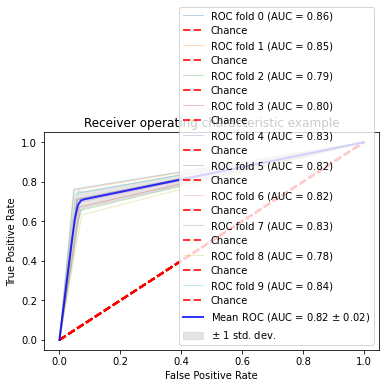

In [32]:

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train_index, test_index in ssplit.split(X,Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_train=to_categorical(y_train)
    y_test=to_categorical(y_test)
    y_pred = model.predict(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_pred.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
